#**Luca Bettini** - dataset bank_term_diposit.csv 



##**descriptive txt**


---


Este dataset contiene información de las campañas de marketing de un banco portugués, nuestro cliente. 

Estas campañas se realizaron mediante llamadas telefónicas a clientes. 

A veces, para que el cliente accediera a comprar el producto (depósito a renta fija) se realizó más de una llamada. 

El dataset incluye información de las llamadas y hay una columna que indica si el cliente compró el producto o no. 

*El cliente quiere mejorar sus campañas a futuro mediante un modelo prodictivo que, con estos datos, prediga si el cliente es más propenso a comprar el producto o no.* 

> Para ello, lo primero que debes hacer es realizar un análisis exploratorio de los datos (EDA).

> Qué puedes observar en estos datos? 

> Afecta el estado civil al hecho de comprar? 

> Qué conclusiones podemos sacar? 

Analiza las variables pensando en el valor que le puedes aportar al cliente con este análisis.

Las columnas son:

1.- age: edad

2.- job: tipo de trabajo

3.- marital: estado civil

4.- education: nivel educativo

5.- housing: dispone de hipoteca?

6.- loan: dispone de un crédito personal?

7.- contact: tipo de contacto con el cliente para esta campaña

8.- month: mes al que se realizó la llamada

9.- day_of_week: día de la semana al que se realizó la llamada

10.- duration: duración de la llamada

11.- campaign: número de llamadas a ese cliente durante la campaña

12.- poutcome: compró el cliente algún producto en alguna campaña anterior?

13.- employment_variation_rate: indicador de empleo global

14.- has_subscribed: compró el producto?

---
**Possible questions:**

Based on "Customers has subscribed or not", can marital knowledge be used 
* to have better performance during the calls, 
* to reduce time and cost, 
* to better focus customer on "marital values" needs, 
* to increase subscriptions,
* to study any new evidence that could appear from data analisys

in order to improve marketing campaign?
***********

#import libraries and upload dataset

dataset is bank_term_diposit.csv

In [1]:
from google.colab import files
#import io
import pandas as pd
import numpy as np

In [2]:
#graph matplot
import matplotlib.pyplot as plt
plt.style.use('classic')
# Línea necesaria para que Matplotlib muestre por defecto los gráficos en nuestro Notebook:
%matplotlib inline

In [3]:
#graph seaborn
import seaborn as sns
sns.set()

In [4]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bank_term_diposit.csv to bank_term_diposit.csv
User uploaded file "bank_term_diposit.csv" with length 3482857 bytes


In [5]:
df = pd.read_csv('bank_term_diposit.csv',delimiter=';',encoding='ISO-8859-1')
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,employment_variation_rate,has_subscribed
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,nonexistent,1.1,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,nonexistent,1.1,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,nonexistent,1.1,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,nonexistent,1.1,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,nonexistent,1.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,nonexistent,-1.1,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,nonexistent,-1.1,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,nonexistent,-1.1,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,nonexistent,-1.1,yes


#complete dataset, quick look

##head, tail, shape, dtypes, describe

In [6]:
df.head(7)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,employment_variation_rate,has_subscribed
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,nonexistent,1.1,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,nonexistent,1.1,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,nonexistent,1.1,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,nonexistent,1.1,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,nonexistent,1.1,no
5,45,services,married,basic.9y,no,no,telephone,may,mon,198,1,nonexistent,1.1,no
6,59,admin.,married,professional.course,no,no,telephone,may,mon,139,1,nonexistent,1.1,no


In [7]:
df.tail(7)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,employment_variation_rate,has_subscribed
41181,37,admin.,married,university.degree,yes,no,cellular,nov,fri,281,1,nonexistent,-1.1,yes
41182,29,unemployed,single,basic.4y,yes,no,cellular,nov,fri,112,1,success,-1.1,no
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,nonexistent,-1.1,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,nonexistent,-1.1,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,nonexistent,-1.1,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,nonexistent,-1.1,yes
41187,74,retired,married,professional.course,yes,no,cellular,nov,fri,239,3,failure,-1.1,no


In [8]:
df.dtypes

age                            int64
job                           object
marital                       object
education                     object
housing                       object
loan                          object
contact                       object
month                         object
day_of_week                   object
duration                       int64
campaign                       int64
poutcome                      object
employment_variation_rate    float64
has_subscribed                object
dtype: object

In [9]:
df.describe()

,age,duration,campaign,employment_variation_rate
count,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.081886
std,10.42125,259.279249,2.770014,1.570960
min,17.00000,0.000000,1.000000,-3.400000
25%,32.00000,102.000000,1.000000,-1.800000
50%,38.00000,180.000000,2.000000,1.100000
75%,47.00000,319.000000,3.000000,1.400000
max,98.00000,4918.000000,56.000000,1.400000


##variables


###*categorical* names and values 

In [10]:
print('job - distinct: ', len(df['job'].unique()))
print('job values: ' , df['job'].unique())
print('marital - distinct: ', len(df['marital'].unique()))
print('marital - values: ' , df['marital'].unique())
print('education - distinct: ', len(df['education'].unique()))
print('education - values: ' , df['education'].unique())
print('housing - distinct: ', len(df['housing'].unique()))
print('housing - values: ' , df['housing'].unique())
print('loan - distinct: ', len(df['loan'].unique()))
print('loan - values: ' , df['loan'].unique())
print('month - distinct: ', len(df['month'].unique()))
print('month - values: ' , df['month'].unique())
print('day_of_week - distinct: ', len(df['day_of_week'].unique()))
print('day_of_week - values: ' , df['day_of_week'].unique())
print('poutcome - distinct: ', len(df['poutcome'].unique()))
print('poutcome - values: ' , df['poutcome'].unique())
print('has_subscribed - distinct: ', len(df['has_subscribed'].unique()))
print('has_subscribed - values: ' , df['has_subscribed'].unique())

job - distinct:  12
job values:  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital - distinct:  4
marital - values:  ['married' 'single' 'divorced' 'unknown']
education - distinct:  8
education - values:  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
housing - distinct:  3
housing - values:  ['no' 'yes' 'unknown']
loan - distinct:  3
loan - values:  ['no' 'yes' 'unknown']
month - distinct:  10
month - values:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week - distinct:  5
day_of_week - values:  ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome - distinct:  3
poutcome - values:  ['nonexistent' 'failure' 'success']
has_subscribed - distinct:  2
has_subscribed - values:  ['no' 'yes']


###*discrete* names and values 

In [11]:
 print('age - distinct: ', len(df['age'].unique()))
 print('age - values: ' , df['age'].unique())
 print('duration - distinct: ', len(df['duration'].unique()))
 print('duration - values: ' , df['duration'].unique())
 print('campaign - distinct: ', len(df['campaign'].unique()))
 print('campaign - values: ' , df['campaign'].unique())
 print('employment_variation_rate - distinct: ', len(df['employment_variation_rate'].unique()))
 print('employment_variation_rate - values: ' , df['employment_variation_rate'].unique())

age - distinct:  78
age - values:  [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
duration - distinct:  1544
duration - values:  [ 261  149  226 ... 1246 1556 1868]
campaign - distinct:  42
campaign - values:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
employment_variation_rate - distinct:  10
employment_variation_rate - values:  [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]


##full dataset: hist plot, pair plot, joint plot (scatter, kde)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe55d288790>,
      dtype=object)

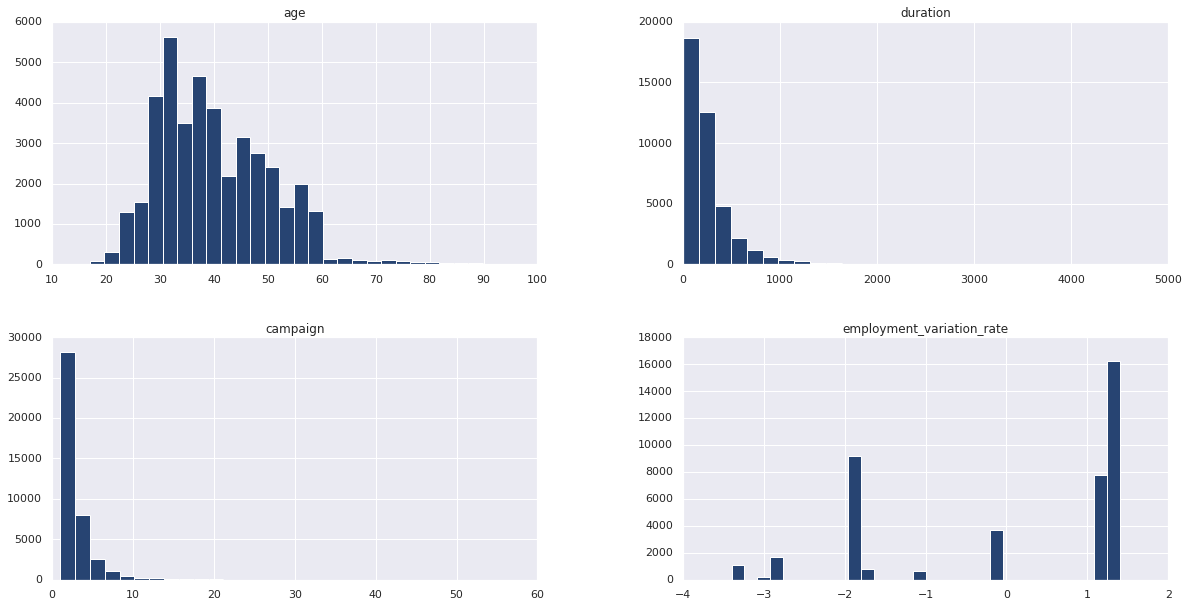

In [12]:
df.hist(bins=30, figsize=[20,10] ,color = '#274472')

<Figure size 1440x1440 with 0 Axes>

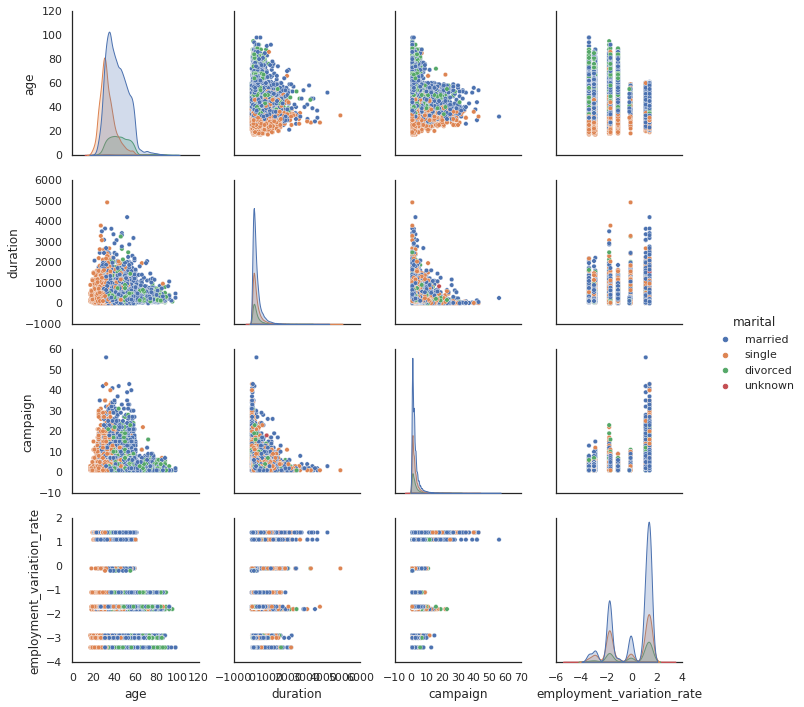

In [13]:
plt.figure(figsize=[20,20])
with sns.axes_style('white'):
  #sns.jointplot("age", "duration", df, kind='scatter', hue="marital")
  sns.pairplot(df, kind='scatter', hue="marital" )

based on "age" pairplot (reflects histogram similar to normal) could be like normal distribution; furthermore "duration" (1544 single values) was choosen to run jointplot samples

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1440x1440 with 0 Axes>

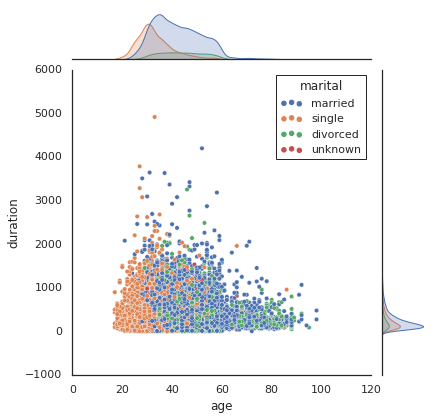

In [14]:
plt.figure(figsize=[20,20])
with sns.axes_style('white'):
  sns.jointplot("age", "duration", df, kind='scatter', hue="marital")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1440x1440 with 0 Axes>

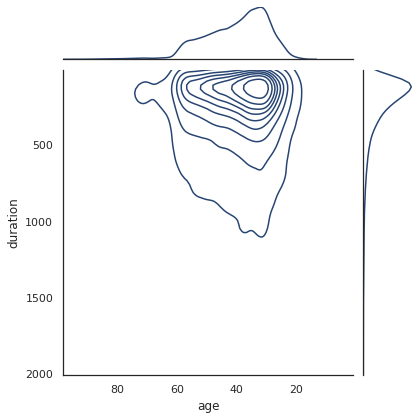

In [15]:
plt.figure(figsize=[20,20])
with sns.axes_style('white'):
  sns.jointplot("age", "duration", df, kind='kde', xlim=df[('age')].max(), ylim=2000,color = '#274472')

##split dataset on subscribed
> split dataset on "yes / no" subscribed value in order to have two sub-dataset;

> first plots - *categorical* variables run on subscribed;

> second plots - *discrete* variables run on subscribed;

In [16]:
df_subyes = df[df.has_subscribed=='yes']
df_subyes.shape

(4640, 14)

In [17]:
df_subno = df[df.has_subscribed=='no']
df_subno.shape

(36548, 14)

###*categorical* variables plot (1)

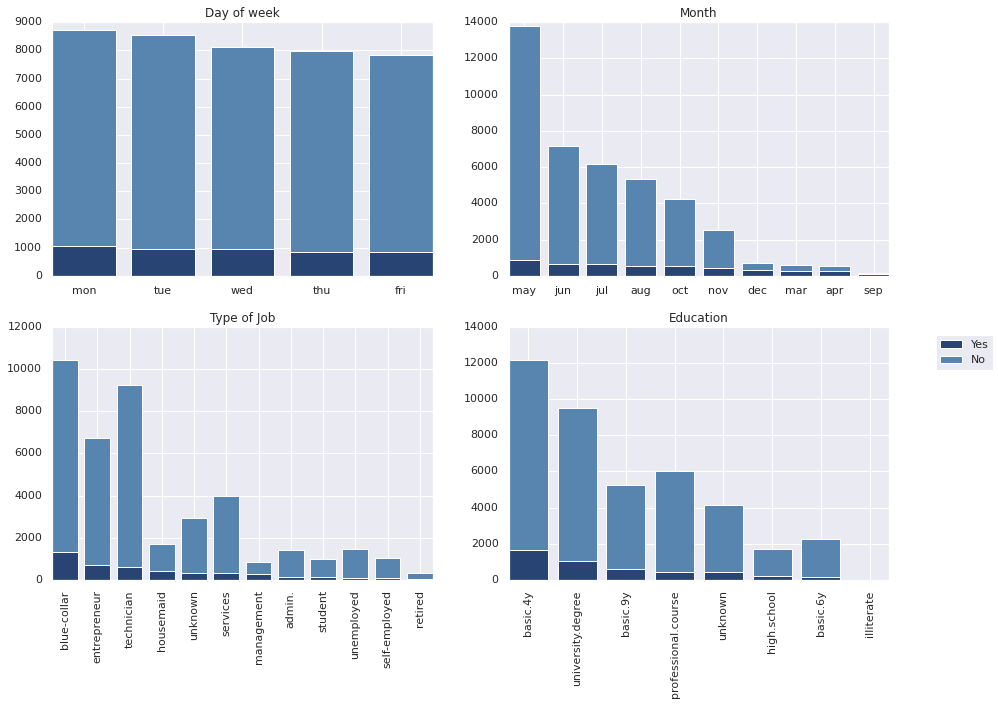

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

b1 = ax[0, 0].bar(df_subyes['day_of_week'].unique(),height = df_subyes['day_of_week'].value_counts(),color='#274472')
b2 = ax[0, 0].bar(df_subno['day_of_week'].unique(),height = df_subno['day_of_week'].value_counts(),bottom = df_subyes['day_of_week'].value_counts(),color = '#5885AF') 
ax[0, 0].title.set_text('Day of week')

ax[0, 1].bar(df_subyes['month'].unique(),height = df_subyes['month'].value_counts(),color='#274472')
ax[0, 1].bar(df_subno['month'].unique(),height = df_subno['month'].value_counts(),bottom = df_subyes['month'].value_counts(),color = '#5885AF') 
ax[0, 1].title.set_text('Month')

ax[1, 0].bar(df_subyes['job'].unique(),height = df_subyes['job'].value_counts(),color='#274472')
ax[1, 0].bar(df_subyes['job'].unique(),height = df_subno['job'].value_counts()[df_subyes['job'].value_counts().index],bottom = df_subyes['job'].value_counts(),color = '#5885AF') 
ax[1, 0].title.set_text('Type of Job')
ax[1, 0].tick_params(axis='x',rotation=90)

ax[1, 1].bar(df_subyes['education'].unique(),height = df_subyes['education'].value_counts(),color='#274472')
ax[1, 1].bar(df_subyes['education'].unique(),height = df_subno['education'].value_counts()[df_subyes['education'].value_counts().index],bottom = df_subyes['education'].value_counts(),color = '#5885AF') 
ax[1, 1].title.set_text('Education')
ax[1, 1].tick_params(axis='x',rotation=90)

plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right")
plt.show()

###*categorical* variables plot (2)

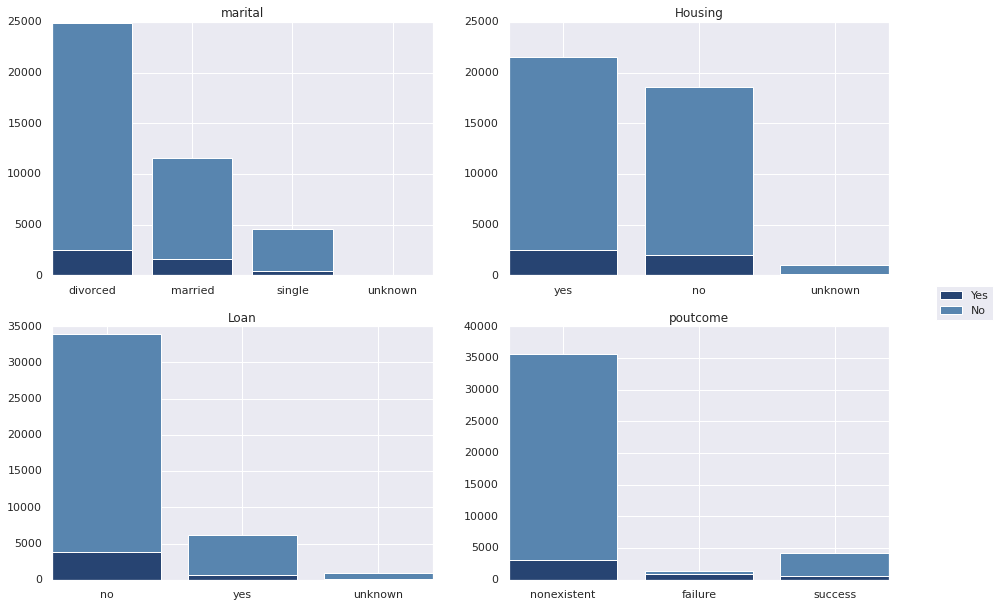

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

b1 = ax[0, 0].bar(df_subyes['marital'].unique(),height = df_subyes['marital'].value_counts(),color='#274472')
b2 = ax[0, 0].bar(df_subyes['marital'].unique(),height = df_subno['marital'].value_counts()[df_subyes['marital'].value_counts().index],bottom = df_subyes['marital'].value_counts(),color = '#5885AF') 
ax[0, 0].title.set_text('marital')

ax[0, 1].bar(df_subyes['housing'].unique(),height = df_subyes['housing'].value_counts(),color='#274472')
ax[0, 1].bar(df_subyes['housing'].unique(),height = df_subno['housing'].value_counts()[df_subyes['housing'].value_counts().index],bottom = df_subyes['housing'].value_counts(),color = '#5885AF') 
ax[0, 1].title.set_text('Housing')

ax[1, 0].bar(df_subyes['loan'].unique(),height = df_subyes['loan'].value_counts(),color='#274472')
ax[1, 0].bar(df_subyes['loan'].unique(),height = df_subno['loan'].value_counts()[df_subyes['loan'].value_counts().index],bottom = df_subyes['loan'].value_counts(),color = '#5885AF') 
ax[1, 0].title.set_text('Loan')

ax[1, 1].bar(df_subyes['poutcome'].unique(),height = df_subyes['poutcome'].value_counts(),color='#274472')
ax[1, 1].bar(df_subyes['poutcome'].unique(),height = df_subno['poutcome'].value_counts()[df_subyes['poutcome'].value_counts().index],bottom = df_subyes['poutcome'].value_counts(),color = '#5885AF') 
ax[1, 1].title.set_text('poutcome')

plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right")
plt.show()

###*discrete* variables plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Legend does not support array([4.100e+01, 2.160e+02, 5.550e+02, 1.818e+03, 2.117e+03, 4.901e+03,
       4.776e+03, 2.964e+03, 3.659e+03, 2.216e+03, 2.912e+03, 2.703e+03,
       1.572e+03, 2.045e+03, 1.212e+03, 1.726e+03, 6.600e+02, 7.500e+01,
       7.900e+01, 3.300e+01, 8.000e+01, 5.900e+01, 2.900e+01, 2.700e+01,
       2.500e+01, 1.900e+01, 1.100e+01, 1.300e+01, 3.000e+00, 2.000e+00]) instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Legend does not support array([ 34.,  88., 227., 236., 539., 614., 351., 434., 311., 179., 248.,
       210., 240., 132., 198., 185.,  57.,  67.,  55.,  33.,  47.,  44.,
        34.,  26.,  22.,  13.,  11.,   3.,   0.,   2.]) instances.
A proxy artist may be used instead.
See: http:

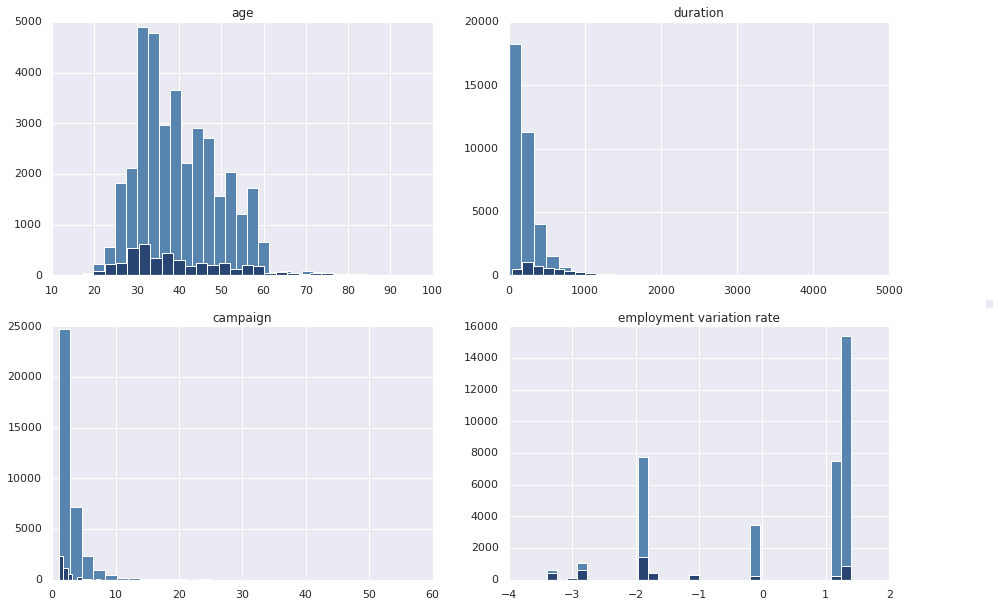

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

b1 = ax[0, 0].hist(df_subno['age'],color ='#5885AF', bins=30) 
b2 = ax[0, 0].hist(df_subyes['age'],color='#274472', bins=30)
ax[0, 0].title.set_text('age')

ax[0, 1].hist(df_subno['duration'],color ='#5885AF', bins=30) 
ax[0, 1].hist(df_subyes['duration'],color='#274472', bins=30)
ax[0, 1].title.set_text('duration')

ax[1, 0].hist(df_subno['campaign'],color ='#5885AF', bins=30) 
ax[1, 0].hist(df_subyes['campaign'],color='#274472', bins=30)
ax[1, 0].title.set_text('campaign')

ax[1, 1].hist(df_subno[df_subno['employment_variation_rate'] != 999]['employment_variation_rate'],color ='#5885AF', bins=30) 
ax[1, 1].hist(df_subyes[df_subyes['employment_variation_rate'] != 999]['employment_variation_rate'],color='#274472', bins=30)
ax[1, 1].title.set_text('employment variation rate')

plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right")
plt.show()

#split dataset (on marital and subscribed)

> plots for every *marital* value in *yes/no subscribed* space (4 cases);

> plots for *yes/no subscribed* value in *marital* space (2 cases);



##yes/no subscribed space

###married on subscribed

In [21]:
df_m_married_s_yes = df[(df.marital=='married') & (df.has_subscribed=='yes')]
df_m_married_s_yes.shape

(2532, 14)

In [26]:
df_m_married_s_no = df[(df.marital=='married') & (df.has_subscribed=='no')]
df_m_married_s_no.shape

(22396, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


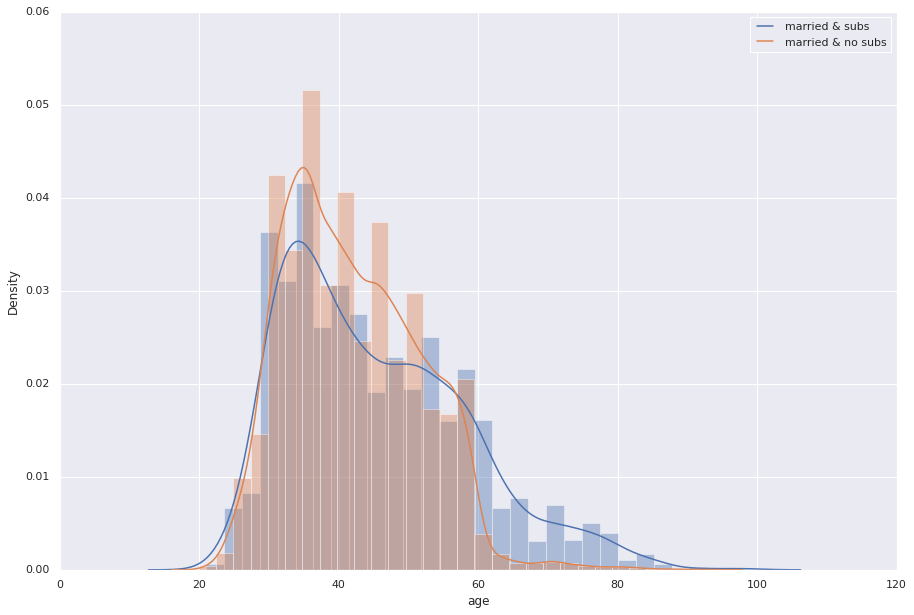

In [27]:
plt.figure(figsize=[15,10])
sns.distplot(df_m_married_s_yes[('age')],bins=30)
sns.distplot(df_m_married_s_no[('age')],bins=30)
plt.legend(['married & subs','married & no subs'], loc='upper right')

###single on subscribed

In [28]:
df_m_single_s_yes = df[(df.marital=='single') & (df.has_subscribed=='yes')]
df_m_single_s_yes.shape

(1620, 14)

In [29]:
df_m_single_s_no = df[(df.marital=='single') & (df.has_subscribed=='no')]
df_m_single_s_no.shape

(9948, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


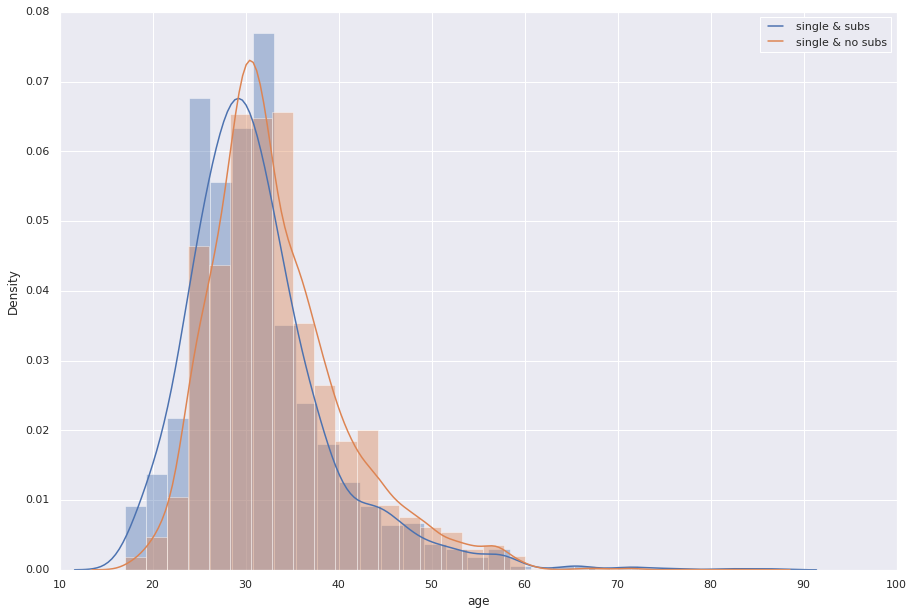

In [30]:
plt.figure(figsize=[15,10])
sns.distplot(df_m_single_s_yes[('age')],bins=30)
sns.distplot(df_m_single_s_no[('age')],bins=30)
plt.legend(['single & subs','single & no subs'], loc='upper right')

###divorced on subscribed

In [31]:
df_m_divorced_s_yes = df[(df.marital=='divorced') & (df.has_subscribed=='yes')]
df_m_divorced_s_yes.shape

(476, 14)

In [32]:
df_m_divorced_s_no = df[(df.marital=='divorced') & (df.has_subscribed=='no')]
df_m_divorced_s_no.shape

(4136, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


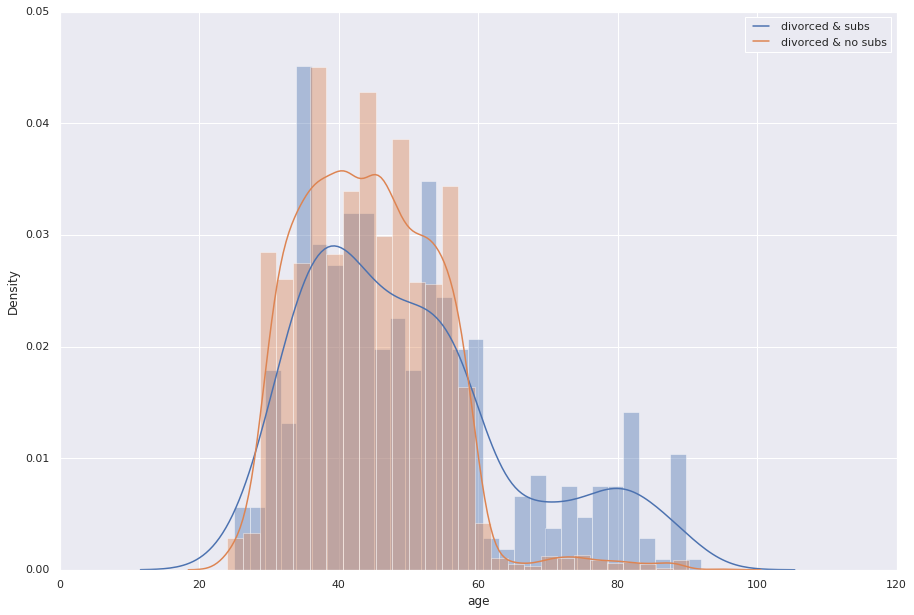

In [33]:
plt.figure(figsize=[15,10])
sns.distplot(df_m_divorced_s_yes[('age')],bins=30)
sns.distplot(df_m_divorced_s_no[('age')],bins=30)
plt.legend(['divorced & subs','divorced & no subs'], loc='upper right')

###unknown on subscribed

In [34]:
df_m_unknown_s_yes = df[(df.marital=='unknown') & (df.has_subscribed=='yes')]
df_m_unknown_s_yes.shape

(12, 14)

In [35]:
df_m_unknown_s_no = df[(df.marital=='unknown') & (df.has_subscribed=='no')]
df_m_unknown_s_no.shape

(68, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


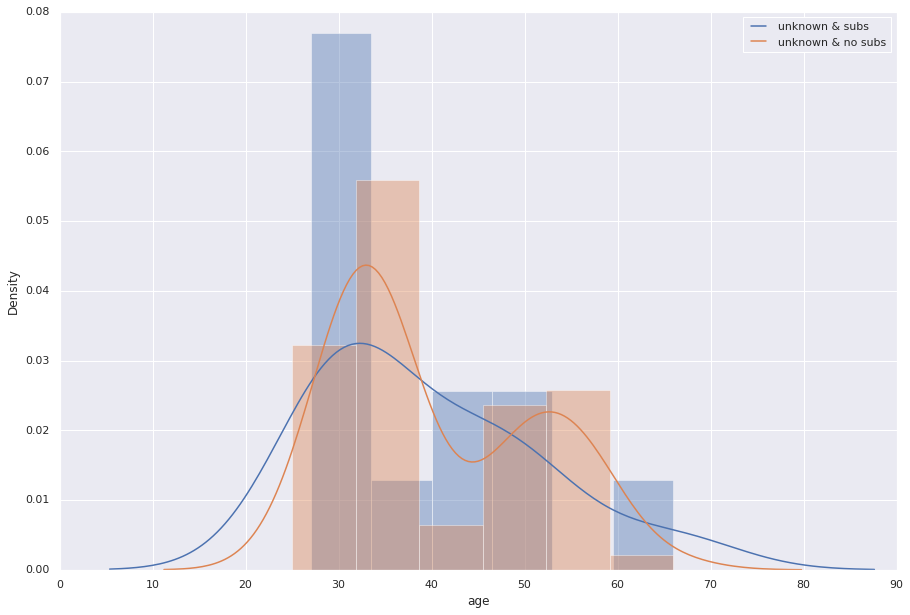

In [36]:
plt.figure(figsize=[15,10])
sns.distplot(df_m_unknown_s_yes[('age')],bins=6)
sns.distplot(df_m_unknown_s_no[('age')],bins=6)
plt.legend(['unknown & subs','unknown & no subs'], loc='upper right')

##marital space


###yes subscribed on marital

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

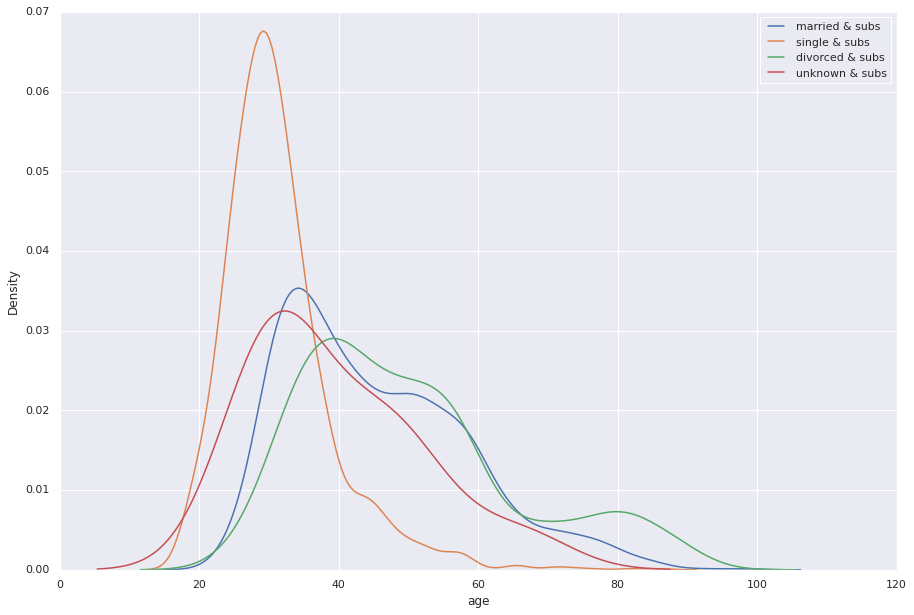

In [37]:
plt.figure(figsize=[15,10])
sns.distplot(df_m_married_s_yes[('age')], hist=False)
sns.distplot(df_m_single_s_yes[('age')], hist=False)
sns.distplot(df_m_divorced_s_yes[('age')], hist=False)
sns.distplot(df_m_unknown_s_yes[('age')], hist=False)
plt.legend(['married & subs','single & subs','divorced & subs','unknown & subs'], loc='upper right')

###no subscribed on marital

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

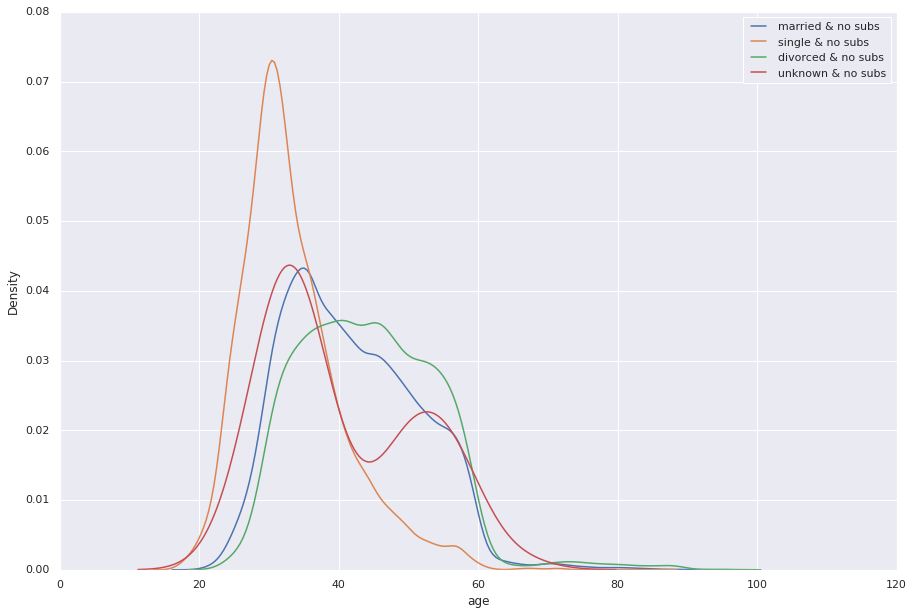

In [38]:
plt.figure(figsize=[15,10])
sns.distplot(df_m_married_s_no[('age')], hist=False)
sns.distplot(df_m_single_s_no[('age')], hist=False)
sns.distplot(df_m_divorced_s_no[('age')], hist=False)
sns.distplot(df_m_unknown_s_no[('age')], hist=False)
plt.legend(['married & no subs','single & no subs','divorced & no subs','unknown & no subs'], loc='upper right')

#conclusions


*  we can observe, once split on "has_subscribed", that dataset is unbalanced;

> "no==has_subscribed" - 36548

> "yes==has_subscribed" - 4640

* "no" value is higher than "yes" value which is reflected in every further split based on "has_subscribed" we perform on dataset; this probably means that data has to be treated in order to have better balance (more samples for "has_subscribed==yes");

* exploratory histogram shows "age" could be like normal distribution, so "age" was choosen to run categorical variables plot to have better visualization performance ("duration" was choosen as well);

* by analysing categorial variables, some variables present "unknown" value; if splitted on "unknown", the reduced datasets often offer only few data; so "unknown" value should be treated carefully;

* from plotting, we can notice some outliers are present so it should be appropriate to handle outliers phenomenon as well;

* from plotting, we can foresee that interesting variables could be run in order to have more plotting info:


> *   educational: performed in **"additional data split"**
> *   poutcome: in order to understand if previous customer are subscribing again
> *   campaign: if there are any boundaries (lower or upper) when call amount during the campaigns succeeds and makes a customer subscribing, maybe could reduce time waste
> *   job: how different job career can influence the subscription
> *   month and day_of_week: if there are season with more or less subscribing maybe could be helpful invest time in running tests against different variables in order to get a better season strategy
> *   loan/housing: if any kind of credit could affect subscriptions path


* "marital" (run with the age) seems to influence the subscription to the new product; for example we can think about different people stages of life, when their "marital" status changes, it seems then that they change their attitude to buy new products too; it looks like a good variable in order to start focusing 4 macro categories to treat and process

* in order to decide how to follow, maybe should be helpful have a talk with dataset probider to ask for further details on dataset variables in order to perform some inference analisys


#*additional data split*

additional plots are based only on the dataset of people who finally subscribed the product (subscribed==yes) split by education and marital

**pay attention: datasets are very small**

> plots for every *marital* value in *educational* space (4 cases)

> plots for every *educational* value in *marital* space (8 cases)

##educational space

###married, subscribed and education

In [39]:
df_m_married_s_yes_edu_basic4 = df[(df.marital=='married') & (df.has_subscribed=='yes') & (df.education=='basic.4y')]
df_m_married_s_yes_edu_basic4.shape

(313, 14)

In [40]:
df_m_married_s_yes_edu_hs = df[(df.marital=='married') & (df.has_subscribed=='yes') & (df.education=='high.school')]
df_m_married_s_yes_edu_hs.shape

(475, 14)

In [41]:
df_m_married_s_yes_edu_basic6 = df[(df.marital=='married') & (df.has_subscribed=='yes') & (df.education=='basic.6y')]
df_m_married_s_yes_edu_basic6.shape

(139, 14)

In [42]:
df_m_married_s_yes_edu_basic9 = df[(df.marital=='married') & (df.has_subscribed=='yes') & (df.education=='basic.9y')]
df_m_married_s_yes_edu_basic9.shape

(298, 14)

In [43]:
df_m_married_s_yes_edu_pc = df[(df.marital=='married') & (df.has_subscribed=='yes') & (df.education=='professional.course')]
df_m_married_s_yes_edu_pc.shape

(357, 14)

In [44]:
df_m_married_s_yes_edu_unknown = df[(df.marital=='married') & (df.has_subscribed=='yes') & (df.education=='unknown')]
df_m_married_s_yes_edu_unknown.shape

(126, 14)

In [45]:
df_m_married_s_yes_edu_ud = df[(df.marital=='married') & (df.has_subscribed=='yes') & (df.education=='university.degree')]
df_m_married_s_yes_edu_ud.shape

(821, 14)

In [46]:
df_m_married_s_yes_edu_illiterate = df[(df.marital=='married') & (df.has_subscribed=='yes') & (df.education=='illiterate')]
df_m_married_s_yes_edu_illiterate.shape

(3, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

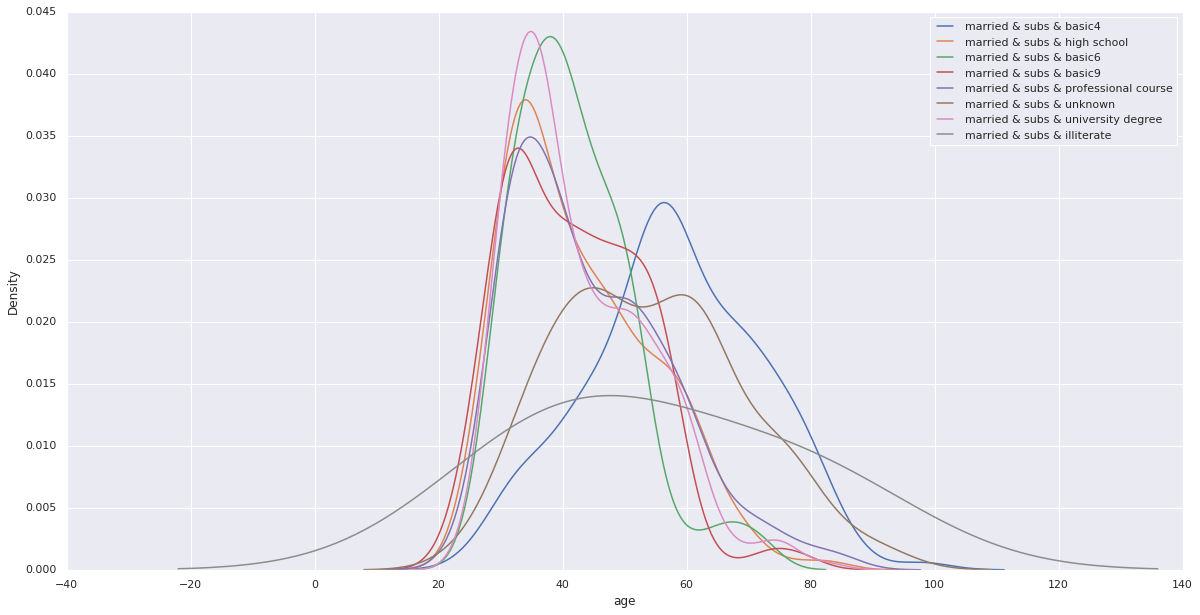

In [47]:
plt.figure(figsize=[20,10])
sns.distplot(df_m_married_s_yes_edu_basic4[('age')],hist=False)
sns.distplot(df_m_married_s_yes_edu_hs[('age')],hist=False)
sns.distplot(df_m_married_s_yes_edu_basic6[('age')],hist=False)
sns.distplot(df_m_married_s_yes_edu_basic9[('age')],hist=False)
sns.distplot(df_m_married_s_yes_edu_pc[('age')],hist=False)
sns.distplot(df_m_married_s_yes_edu_unknown[('age')],hist=False)
sns.distplot(df_m_married_s_yes_edu_ud[('age')],hist=False)
sns.distplot(df_m_married_s_yes_edu_illiterate[('age')],hist=False)
plt.legend(['married & subs & basic4','married & subs & high school','married & subs & basic6','married & subs & basic9','married & subs & professional course','married & subs & unknown','married & subs & university degree','married & subs & illiterate'], loc='upper right')

###single, subscribed and education

In [48]:
df_m_single_s_yes_edu_basic4 = df[(df.marital=='single') & (df.has_subscribed=='yes') & (df.education=='basic.4y')]
df_m_single_s_yes_edu_basic4.shape

(31, 14)

In [49]:
df_m_single_s_yes_edu_hs = df[(df.marital=='single') & (df.has_subscribed=='yes') & (df.education=='high.school')]
df_m_single_s_yes_edu_hs.shape

(448, 14)

In [50]:
df_m_single_s_yes_edu_basic6 = df[(df.marital=='single') & (df.has_subscribed=='yes') & (df.education=='basic.6y')]
df_m_single_s_yes_edu_basic6.shape

(36, 14)

In [51]:
df_m_single_s_yes_edu_basic9 = df[(df.marital=='single') & (df.has_subscribed=='yes') & (df.education=='basic.9y')]
df_m_single_s_yes_edu_basic9.shape

(142, 14)

In [ ]:
df_m_single_s_yes_edu_pc = df[(df.marital=='single') & (df.has_subscribed=='yes') & (df.education=='professional.course')]
df_m_single_s_yes_edu_pc.shape

(177, 14)

In [ ]:
df_m_single_s_yes_edu_unknown = df[(df.marital=='single') & (df.has_subscribed=='yes') & (df.education=='unknown')]
df_m_single_s_yes_edu_unknown.shape

(103, 14)

In [ ]:
df_m_single_s_yes_edu_ud = df[(df.marital=='single') & (df.has_subscribed=='yes') & (df.education=='university.degree')]
df_m_single_s_yes_edu_ud.shape

(683, 14)

In [ ]:
df_m_single_s_yes_edu_illiterate = df[(df.marital=='single') & (df.has_subscribed=='yes') & (df.education=='illiterate')]
df_m_single_s_yes_edu_illiterate.shape

(0, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

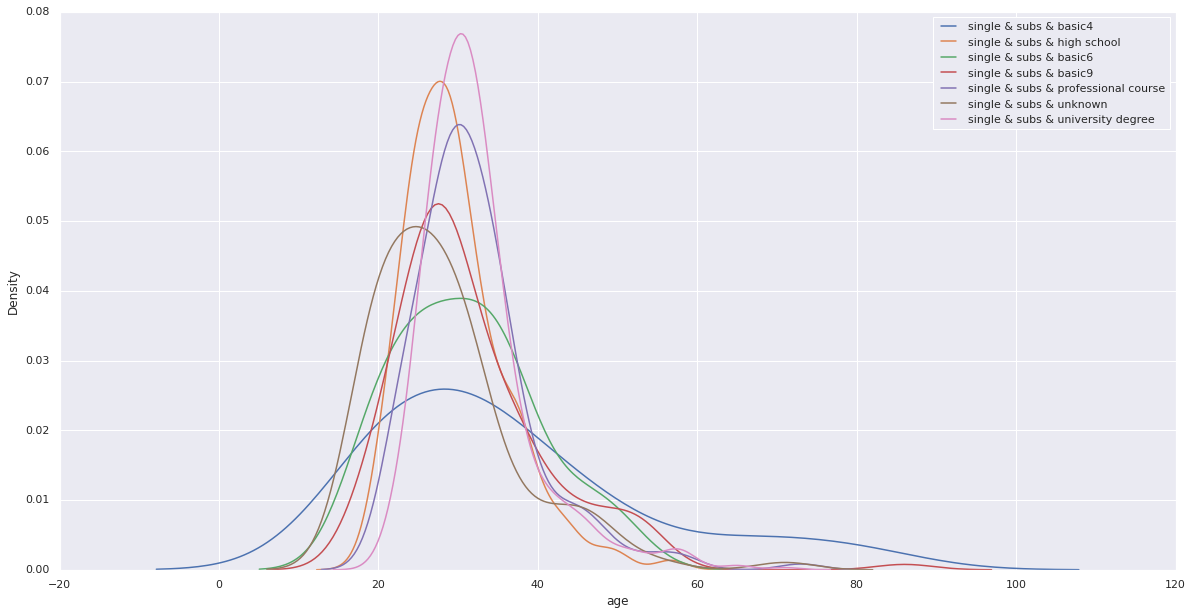

In [ ]:
plt.figure(figsize=[20,10])
sns.distplot(df_m_single_s_yes_edu_basic4[('age')],hist=False,)
sns.distplot(df_m_single_s_yes_edu_hs[('age')],hist=False)
sns.distplot(df_m_single_s_yes_edu_basic6[('age')],hist=False)
sns.distplot(df_m_single_s_yes_edu_basic9[('age')],hist=False)
sns.distplot(df_m_single_s_yes_edu_pc[('age')],hist=False)
sns.distplot(df_m_single_s_yes_edu_unknown[('age')],hist=False)
sns.distplot(df_m_single_s_yes_edu_ud[('age')],hist=False)
#sns.distplot(df_m_single_s_yes_edu_illiterate[('age')],hist=False)
plt.legend(['single & subs & basic4','single & subs & high school','single & subs & basic6','single & subs & basic9','single & subs & professional course','single & subs & unknown','single & subs & university degree'], loc='upper right')

###divorced, subscribed and education

In [ ]:
df_m_divorced_s_yes_edu_basic4 = df[(df.marital=='divorced') & (df.has_subscribed=='yes') & (df.education=='basic.4y')]
df_m_divorced_s_yes_edu_basic4.shape

(83, 14)

In [ ]:
df_m_divorced_s_yes_edu_hs = df[(df.marital=='divorced') & (df.has_subscribed=='yes') & (df.education=='high.school')]
df_m_divorced_s_yes_edu_hs.shape

(107, 14)

In [ ]:
df_m_divorced_s_yes_edu_basic6 = df[(df.marital=='divorced') & (df.has_subscribed=='yes') & (df.education=='basic.6y')]
df_m_divorced_s_yes_edu_basic6.shape

(13, 14)

In [ ]:
df_m_divorced_s_yes_edu_basic9 = df[(df.marital=='divorced') & (df.has_subscribed=='yes') & (df.education=='basic.9y')]
df_m_divorced_s_yes_edu_basic9.shape

(31, 14)

In [ ]:
df_m_divorced_s_yes_edu_pc = df[(df.marital=='divorced') & (df.has_subscribed=='yes') & (df.education=='professional.course')]
df_m_divorced_s_yes_edu_pc.shape

(61, 14)

In [ ]:
df_m_divorced_s_yes_edu_unknown = df[(df.marital=='divorced') & (df.has_subscribed=='yes') & (df.education=='unknown')]
df_m_divorced_s_yes_edu_unknown.shape

(20, 14)

In [ ]:
df_m_divorced_s_yes_edu_ud = df[(df.marital=='divorced') & (df.has_subscribed=='yes') & (df.education=='university.degree')]
df_m_divorced_s_yes_edu_ud.shape

(160, 14)

In [ ]:
df_m_divorced_s_yes_edu_illiterate = df[(df.marital=='divorced') & (df.has_subscribed=='yes') & (df.education=='illiterate')]
df_m_divorced_s_yes_edu_illiterate.shape

(1, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

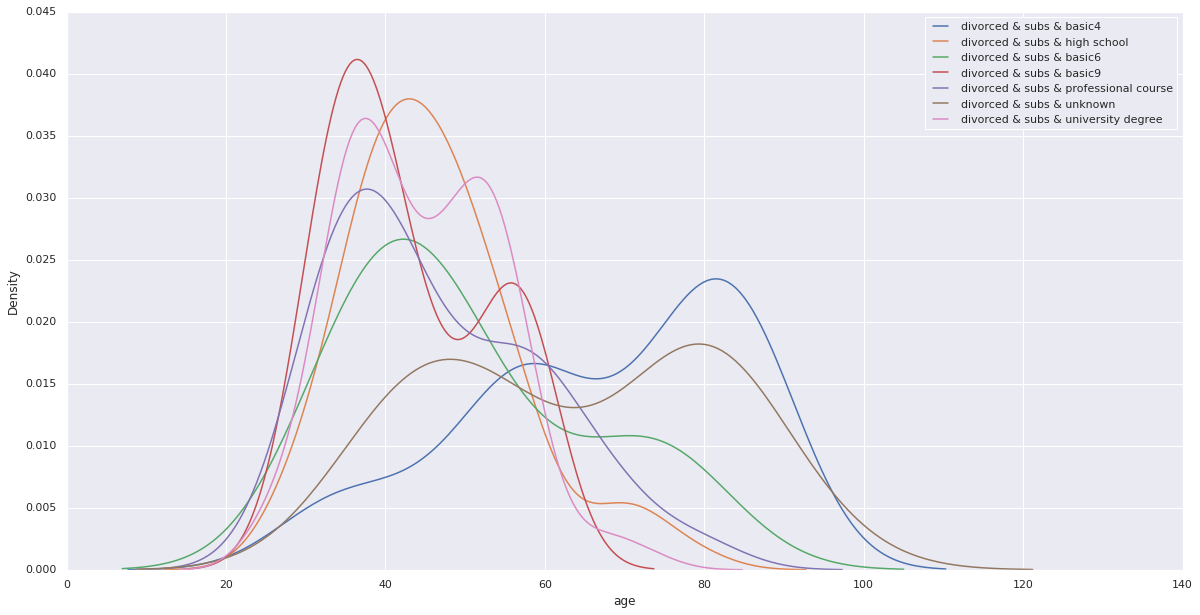

In [ ]:
plt.figure(figsize=[20,10])
sns.distplot(df_m_divorced_s_yes_edu_basic4[('age')],hist=False)
sns.distplot(df_m_divorced_s_yes_edu_hs[('age')],hist=False)
sns.distplot(df_m_divorced_s_yes_edu_basic6[('age')],hist=False)
sns.distplot(df_m_divorced_s_yes_edu_basic9[('age')],hist=False)
sns.distplot(df_m_divorced_s_yes_edu_pc[('age')],hist=False)
sns.distplot(df_m_divorced_s_yes_edu_unknown[('age')],hist=False)
sns.distplot(df_m_divorced_s_yes_edu_ud[('age')],hist=False)
#sns.distplot(df_m_divorced_s_yes_edu_illiterate[('age')],hist=False)
plt.legend(['divorced & subs & basic4','divorced & subs & high school','divorced & subs & basic6','divorced & subs & basic9','divorced & subs & professional course','divorced & subs & unknown','divorced & subs & university degree'], loc='upper right')

###unknown, subscribed and education

In [ ]:
df_m_unknown_s_yes_edu_basic4 = df[(df.marital=='unknown') & (df.has_subscribed=='yes') & (df.education=='basic.4y')]
df_m_unknown_s_yes_edu_basic4.shape

(1, 14)

In [ ]:
df_m_unknown_s_yes_edu_hs = df[(df.marital=='unknown') & (df.has_subscribed=='yes') & (df.education=='high.school')]
df_m_unknown_s_yes_edu_hs.shape

(1, 14)

In [ ]:
df_m_unknown_s_yes_edu_basic6 = df[(df.marital=='unknown') & (df.has_subscribed=='yes') & (df.education=='basic.6y')]
df_m_unknown_s_yes_edu_basic6.shape

(0, 14)

In [ ]:
df_m_unknown_s_yes_edu_basic9 = df[(df.marital=='unknown') & (df.has_subscribed=='yes') & (df.education=='basic.9y')]
df_m_unknown_s_yes_edu_basic9.shape

(2, 14)

In [ ]:
df_m_unknown_s_yes_edu_pc = df[(df.marital=='unknown') & (df.has_subscribed=='yes') & (df.education=='professional.course')]
df_m_unknown_s_yes_edu_pc.shape

(0, 14)

In [ ]:
df_m_unknown_s_yes_edu_unknown = df[(df.marital=='unknown') & (df.has_subscribed=='yes') & (df.education=='unknown')]
df_m_unknown_s_yes_edu_unknown.shape

(2, 14)

In [ ]:
df_m_unknown_s_yes_edu_ud = df[(df.marital=='unknown') & (df.has_subscribed=='yes') & (df.education=='university.degree')]
df_m_unknown_s_yes_edu_ud.shape

(6, 14)

In [ ]:
df_m_unknown_s_yes_edu_illiterate = df[(df.marital=='unknown') & (df.has_subscribed=='yes') & (df.education=='illiterate')]
df_m_unknown_s_yes_edu_illiterate.shape

(0, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.

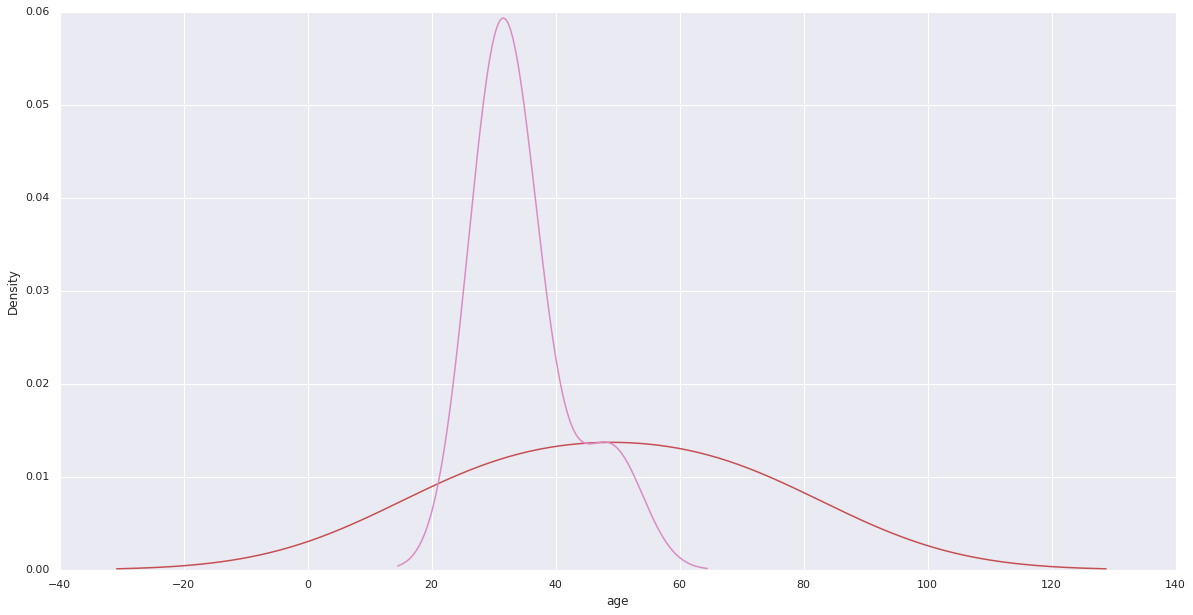

In [ ]:
plt.figure(figsize=[20,10])
sns.distplot(df_m_unknown_s_yes_edu_basic4[('age')],hist=False)
sns.distplot(df_m_unknown_s_yes_edu_hs[('age')],hist=False)
sns.distplot(df_m_unknown_s_yes_edu_basic6[('age')],hist=False)
sns.distplot(df_m_unknown_s_yes_edu_basic9[('age')],hist=False)
sns.distplot(df_m_unknown_s_yes_edu_pc[('age')],hist=False)
sns.distplot(df_m_unknown_s_yes_edu_unknown[('age')],hist=False)
sns.distplot(df_m_unknown_s_yes_edu_ud[('age')],hist=False)
sns.distplot(df_m_unknown_s_yes_edu_illiterate[('age')],hist=False)
#plt.legend(['unknown & subs & basic4','unknown & subs & high school','unknown & subs & basic6','unknown & subs & basic9','unknown & subs & professional course','unknown & subs & unknown','unknown & subs & university degree'], loc='upper right')

at this depth split, marital "unknown" value has so few data so it's impossible to have a clear plot

##marital space
(in many cases, marital "unknown" value and/or educational "illiterate" have so few data so it's impossible to have a clear plot)

###marital, subscribed and education==basic4

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


NameError: ignored

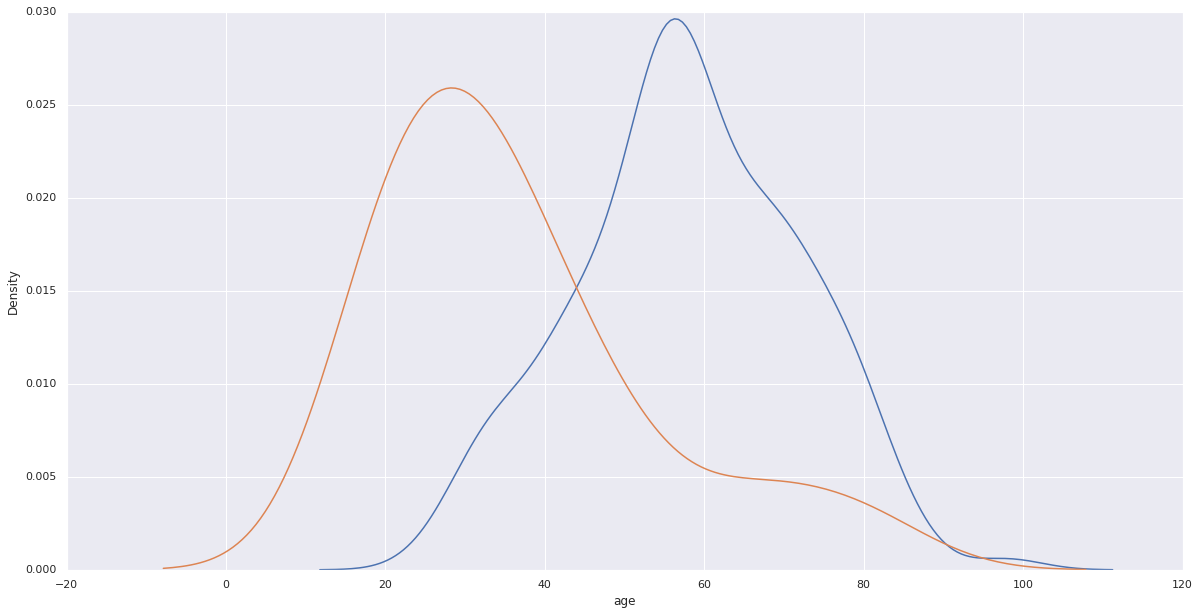

In [52]:
plt.figure(figsize=[20,10])
sns.distplot(df_m_married_s_yes_edu_basic4[('age')],hist=False)
sns.distplot(df_m_single_s_yes_edu_basic4[('age')],hist=False)
sns.distplot(df_m_divorced_s_yes_edu_basic4[('age')],hist=False)
plt.legend(['married & subs & basic4','single & subs & basic4','divorced & subs & basic4'], loc='upper right')

###marital, subscribed and education==high school

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


NameError: ignored

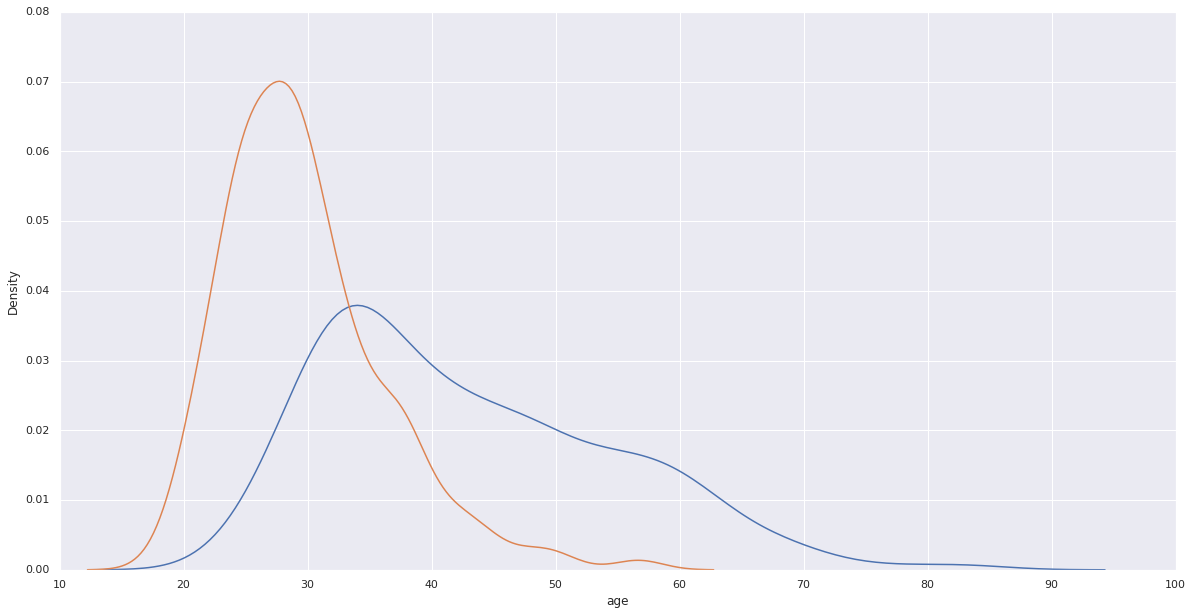

In [53]:
plt.figure(figsize=[20,10])
sns.distplot(df_m_married_s_yes_edu_hs[('age')],hist=False)
sns.distplot(df_m_single_s_yes_edu_hs[('age')],hist=False)
sns.distplot(df_m_divorced_s_yes_edu_hs[('age')],hist=False)
plt.legend(['married & subs & high school','single & subs & high school','divorced & subs & high school'], loc='upper right')

###marital, subscribed and education==basic6

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

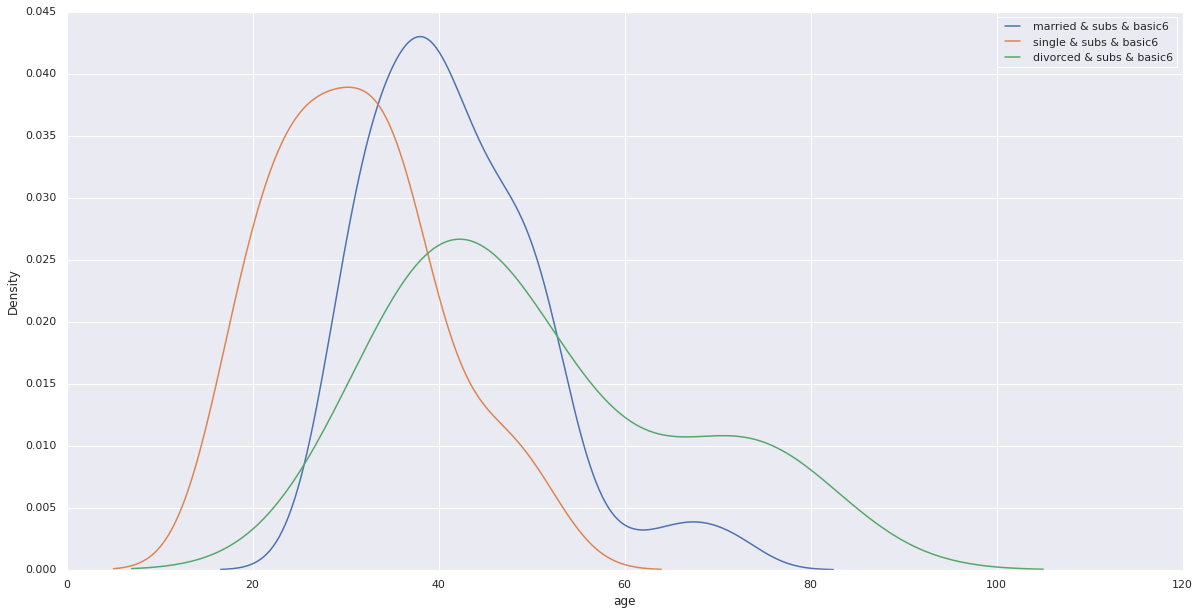

In [ ]:
plt.figure(figsize=[20,10])
sns.distplot(df_m_married_s_yes_edu_basic6[('age')],hist=False)
sns.distplot(df_m_single_s_yes_edu_basic6[('age')],hist=False)
sns.distplot(df_m_divorced_s_yes_edu_basic6[('age')],hist=False)
plt.legend(['married & subs & basic6','single & subs & basic6','divorced & subs & basic6'], loc='upper right')

###marital, subscribed and education==basic9

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

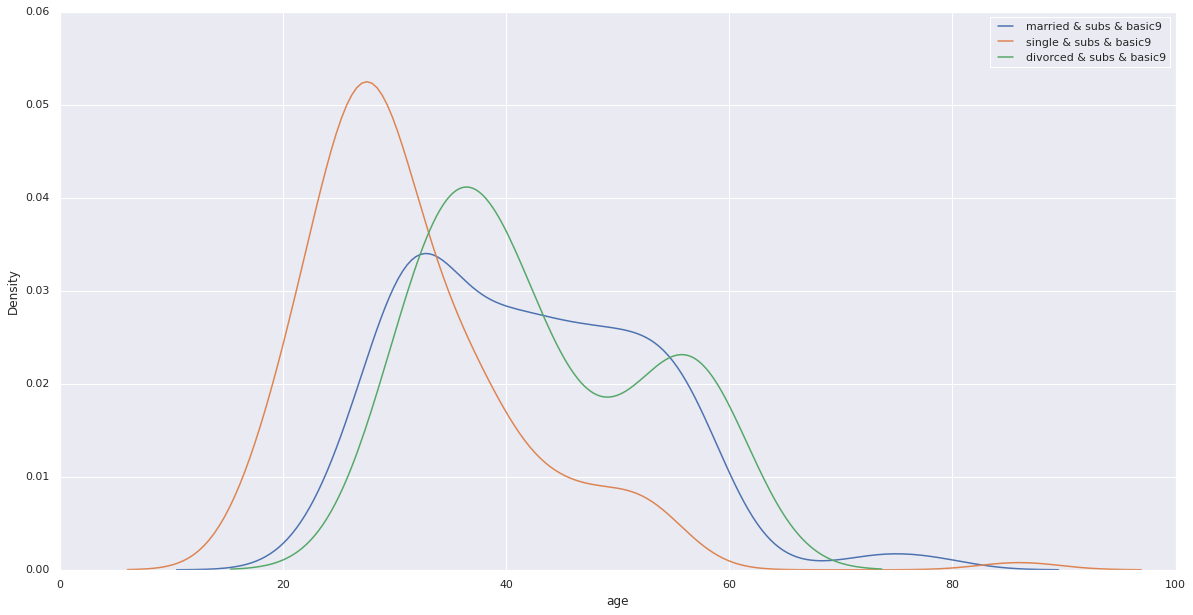

In [ ]:
plt.figure(figsize=[20,10])
sns.distplot(df_m_married_s_yes_edu_basic9[('age')],hist=False)
sns.distplot(df_m_single_s_yes_edu_basic9[('age')],hist=False)
sns.distplot(df_m_divorced_s_yes_edu_basic9[('age')],hist=False)
plt.legend(['married & subs & basic9','single & subs & basic9','divorced & subs & basic9'], loc='upper right')

###marital, subscribed and education==professional course

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

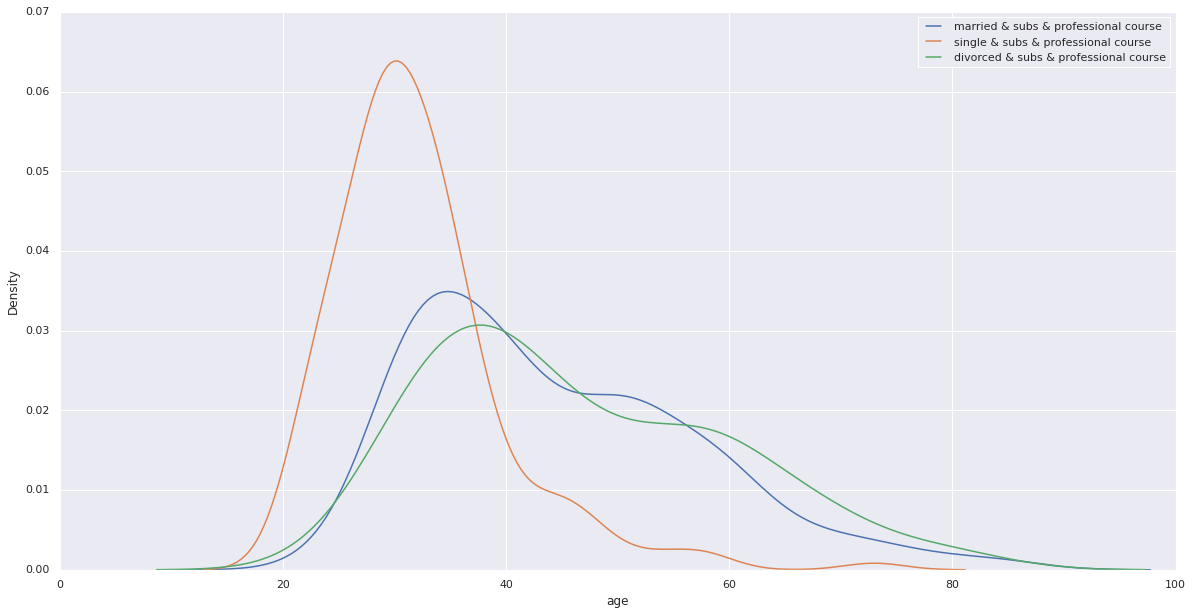

In [ ]:
plt.figure(figsize=[20,10])
sns.distplot(df_m_married_s_yes_edu_pc[('age')],hist=False)
sns.distplot(df_m_single_s_yes_edu_pc[('age')],hist=False)
sns.distplot(df_m_divorced_s_yes_edu_pc[('age')],hist=False)
plt.legend(['married & subs & professional course','single & subs & professional course','divorced & subs & professional course'], loc='upper right')

###marital, subscribed and education==unknown

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

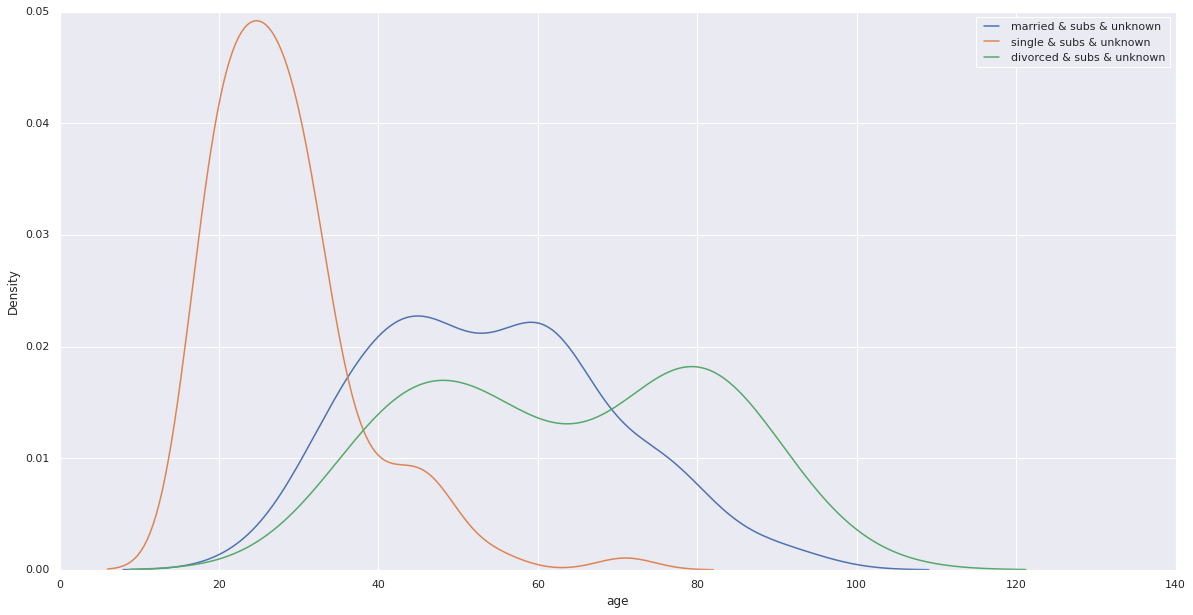

In [ ]:
plt.figure(figsize=[20,10])
sns.distplot(df_m_married_s_yes_edu_unknown[('age')],hist=False)
sns.distplot(df_m_single_s_yes_edu_unknown[('age')],hist=False)
sns.distplot(df_m_divorced_s_yes_edu_unknown[('age')],hist=False)
plt.legend(['married & subs & unknown','single & subs & unknown','divorced & subs & unknown'], loc='upper right')

###marital, subscribed and education==university degree

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

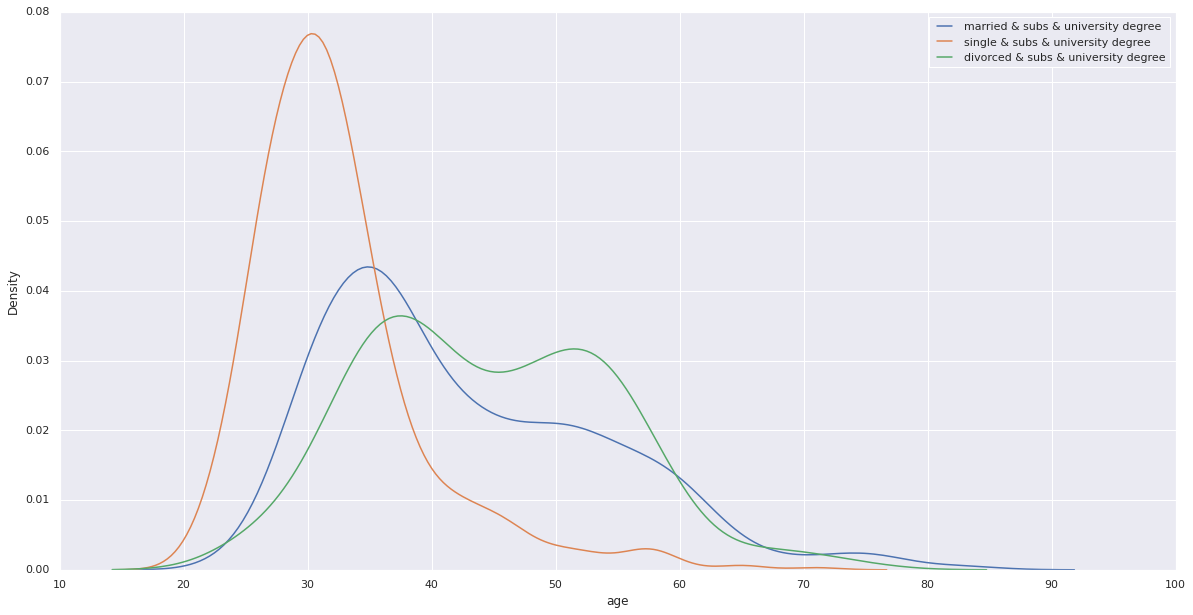

In [ ]:
plt.figure(figsize=[20,10])
sns.distplot(df_m_married_s_yes_edu_ud[('age')],hist=False)
sns.distplot(df_m_single_s_yes_edu_ud[('age')],hist=False)
sns.distplot(df_m_divorced_s_yes_edu_ud[('age')],hist=False)
plt.legend(['married & subs & university degree','single & subs & university degree','divorced & subs & university degree'], loc='upper right')

###marital, subscribed and education==illiterate



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dty

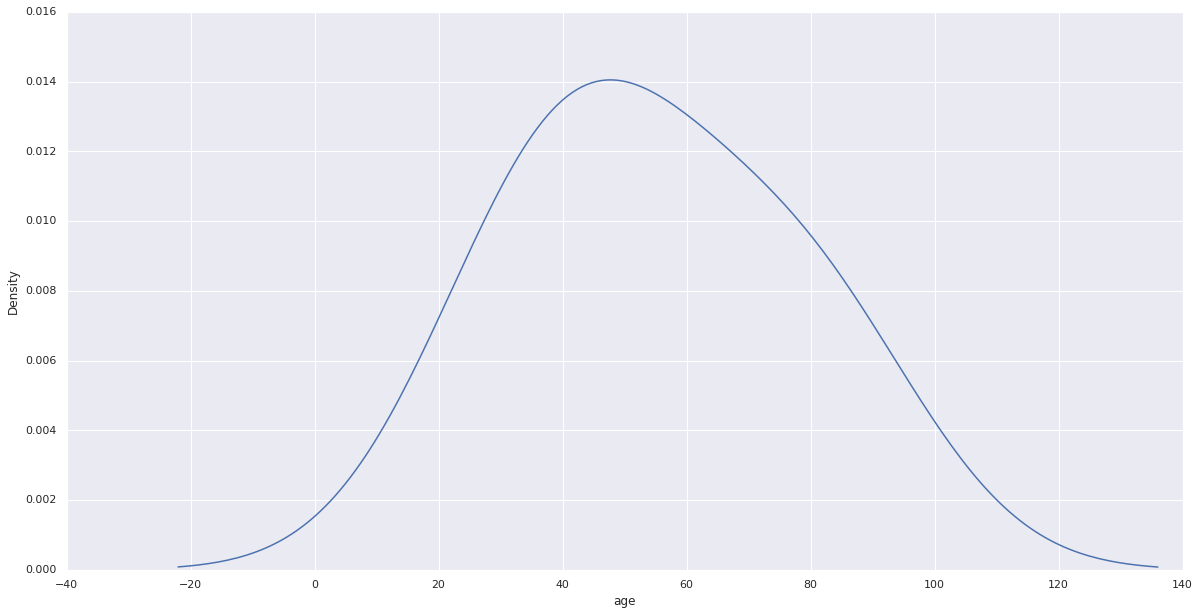

In [ ]:
plt.figure(figsize=[20,10])
sns.distplot(df_m_married_s_yes_edu_illiterate[('age')],hist=False)
sns.distplot(df_m_single_s_yes_edu_illiterate[('age')],hist=False)
sns.distplot(df_m_divorced_s_yes_edu_illiterate[('age')],hist=False)
#plt.legend(['married & subs & illiterate','single & subs & illiterate','divorced & subs & illiterate'], loc='upper right')

in this case, educational "illiterate" value has few data, so it's impossible to have clear plot